# Duboko učenje - laboratorijska vježba - generativni modeli - Varijacijski autoenkoder (VAE)

Autoenkoder je mreža s prolazom u naprijed koja za treniranje koristi backpropagation te može imati duboku strukturu. Autoenkoderi su gnereativne mreže sa karakterističnom dvodjelonom strukturom. Prvi dio naziva se enkoder i preslikava (enkodira) ulazni sloj u skriveni sloj.  Drugi dio je dekoder i preslikava skriveni sloj u izlazni sloj. Primarni cilj takve mreže je postići što veću sličnost ulaza i izlaza  za svaki uzorak za treniranje, maksimizirajući neku mjeru sličnosti. Primarni cilj je jednostavan, što autoenkodere svrstava u mreže koje se treniraju bez nadzora. Maksimalna uspješnost može se jednostavno postići direktnim kopiranjem ulaz izlaz, no to nije u skladu sa skrivenim ciljem. Uvjetno rečeno skriveni cilj, koji je u stvari jedini interesantan, je naučiti bitne značajke uzoraka iz skupa za treniranje. Da bi se to postiglo, i izbjeglo direktno kopiranje, koriste se razne tehnike regularizacije. Alterativno, može se koristiti druga mjera uspješnosti, poput maksimiziranja vjerojatnsoti. U svakom slučaju, varijable skrivenog sloja $\mathbf z$ zadužene su za otkrivanje bitnih značajki ulaznih uzoraka.

[Varijacijski autoenkoderi (VAE)](http://arxiv.org/abs/1312.6114) su Autoenkoderi koji maksimiziraju vjerojatnost $p(\mathbf x)$ svih uzoraka za treniranje $\mathbf x^{(i)}$. Kod VAE se ne koriste dodatne regularizacijske tehnike, ali neke od njih se mogu uključiti u VAE (npr. kombinacija VAE i denoising autoenkodera daje bolje rezultate). Bitne značajke u skrivenom sloju $\mathbf z$ tada imaju ulogu u modeliranju $p(\mathbf x)$. 

$$
p(\mathbf{x})=\int
p(\mathbf{x}\vert \mathbf{z};\theta
)p(\mathbf{z})\mathbf{\mathit{dz}}
$$

Vjerojatnosti sa desne strane jednadžbe su jednako nepoznate kao i $p(\mathbf x)$, no njih ćemo aproksimirati Gaussovim distribucijama. $\Theta$ su parametri modela i njih određujemo kroz postupak treniranja. Dodatni cilj nam je minimizirati količinu uzorkovanja, koje je obično nužno porvoditi kod estimacija nepoznatih distribucija.
U ovom slučaju, pogodno je maksimizirati logaritam vjerojatnosti.

$$
\log _{\mathbf{\theta }}p(\mathbf{x}^{(1)},\ldots
,\mathbf{x}^{(N)})=\sum _{i=1}^{N}\log
_{\mathbf{\theta }}p(\mathbf{x}^{(i)})
$$

Za $p(\mathbf z)$ odabiremo normalnu distribuciju

$$
p(z)=N(0,1)
$$

Time ih ograničavamo i naizgled onemogučavamo u tome da poredstavljaju bitne značajke. 

<center>
<div>
  <img src="https://dlunizg.github.io/assets/lab4/VAE1.svg" width="20%">
</div>
</center>

Dekoderskim dijelom modeliramo uvjetnu distribuciju $p(\mathbf x \vert \mathbf z)$ kao normalnu distribuciju, a parametre te distribucije određuju parametri mreže $\Theta$.

$$
p_{\mathbf{\theta }}(x\vert z)=N(\mu _{x}(z),\sigma _{x}(z))
$$

Parametri $\Theta$ uključuju težine i pomake svih neurona skrivenih slojeva dekodera te se određuju kroz treniranje. Složenost $p(\mathbf x \vert \mathbf z)$ ovisi o broju skrivenih slojeva i broju neurona u njima. Crtkane linije na dijagramu označavaju operacije uzorkovanja. U dijagramu je radi preglednosti prikazana samo jedna varijabla z, umjesto vektora skrivenih varijabli $\mathbf z$.

<center>
<div>
  <img src="https://dlunizg.github.io/assets/lab4/VAE_dec.svg" width="30%">
  <div class="figcaption figcenter">Dekoderski dio</div>
</div>
</center>

Sada bi trebalo odrediti $p(\mathbf z \vert \mathbf x)$, takav da gornje pretpostavke dobro funkcioniraju. Kako nemamo načina odrediti odgovarajući $p(\mathbf z \vert \mathbf x)$, aproksimarati ćemo ga normalnom distribucijom $q(\mathbf z \vert \mathbf x)$, ali ćemo pažljivo odrediti parametre te zamjenske distribucije.

$$
q_{\mathbf{\phi
}}(\mathbf{z}\vert \mathbf{x})=N(\mathbf{\mu
_{z}(x),\sigma _{z}(x)})
$$

<center>
<div>
  <img src="https://dlunizg.github.io/assets/lab4/VAE_enc.svg" width="30%">
  <div class="figcaption figcenter">Enkoderski dio</div>
</div>
</center>

Slično kao i kod dekodera, parametri $\Phi$ uključuju težine i pomake skrivnih slojeva enkodera te se oni određuju kroz postupak treniranja. Kompleksnost $q(\mathbf z \vert \mathbf x)$ ovisi o broju skrivenih slojeva i broju neurona u njima. 

Model je sada potpun, samo nam još treba funkcija cilja koju možemo optimizirati ispravnim odabirom parametara $\Theta$ i $\Phi$.

<center>
<div>
  <img src="https://dlunizg.github.io/assets/lab4/VAE_enc_dec1.svg" width="50%">
</div>
</center>

Neuroni koji predstavljaju srednje vrijednosti i standardne devijacije obično nemaju nelinearne aktivacijske funkcije. 
Kako smo već naveli, želja nam je maksimizirati 

$$
\log _{\mathbf{\theta }}p(\mathbf{x}^{(1)},\ldots
,\mathbf{x}^{(N)})=\sum _{i=1}^{N}\log
_{\mathbf{\theta }}p(\mathbf{x}^{(i)})
$$

Prikladnom transformacijom $\log(p(\mathbf x))$, što je jedan pribrojnik u grnjoj jednadžbi, možemo prikazati kao

$$
\text{}\log (p(\mathbf x))=D_{\mathit{KL}}\left(q( \mathbf z\vert \mathbf x)\parallel
p(\mathbf z\vert \mathbf x)\right)-D_{\mathit{KL}}\left(q(\mathbf z\vert \mathbf x)\parallel p(\mathbf z)\right)+\text{E}_{q(\mathbf z\vert \mathbf x)}\left(\log
(p(\mathbf x\vert \mathbf z))\right)
$$

$D_{\mathit{KL}}$ je [Kullback–Leibler divergencija](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) i predstavlja mjeru sličnosti dviju distribucija. Kako $p(\mathbf z\vert \mathbf x)$ mijenjamo sa $q(\mathbf z\vert \mathbf x)$, logično je težiti tome da te dvije distribucije budu što sličnije. Tada bi KL divergencija u prvom pribrojniku težila maksimumu, no kako nam je $p(\mathbf z\vert \mathbf x)$ nepoznat, maksimiziramo preostala dva pribrojnika. Te dvije komponente zajedno čine donju varijacijsku granicu $L$ od $log(p(\mathbf x))$ te maksimizacijom donje granice podižemo ukupnu vjerojatnost ulaznog uzorka $\mathbf x$. 

$$
L(\mathbf{\theta ,\phi
,x^{(i)}})=-D_{\mathit{KL}}\left(q_{\mathbf{\phi
}}(\mathbf{z}\vert \mathbf{x}^{(i)})\parallel
p(\mathbf{z})\right)+\text{E}_{q_{\mathbf{\phi
}}(\mathbf{z}\vert \mathbf{x}^{(i)})}\left[\log
(p_{\mathbf{\theta
}}(\mathbf{x}^{(i)}\vert \mathbf{z}))\right]
$$

Drugi pribrojnik u gornjoj jednadžbi možemo promatrati kao mjeru uspješnosti rekonstrukcije (mogući maksimum je log(1) kada skriveni sloj $\mathbf z$ omogućuje savršenu rekonstrukciju). Prvi član se smatra regularizacijskom komponentom te on potiče izjendačavaje distribucija $q(\mathbf z\vert \mathbf x)$ i $p(\mathbf z)$.

Uz odabrane aproksimacije
$q_{\mathbf{\phi }}(z\vert x)=N(\mu _{z}(x),\sigma _{z}(x))
$
$
p(z)=N(0,1)
$
$
p_{\mathbf{\theta }}(x\vert z)=N(\mu _{x}(z),\sigma _{x}(z))
$
dvije komponente donje varijacijske granice postaju

$$\begin{equation*}
-D_{\mathit{KL}}\left(q_{\mathbf{\phi
}}(\mathbf{z}\vert \mathbf{x}^{(i)})\parallel
p(\mathbf{z})\right)=\frac{1}{2}\sum _{j}\left(1+\log (\sigma
_{z_{j}}^{(i)2})-\mu _{z_{j}}^{(i)2}-\sigma _{z_{j}}^{(i)2}\right)
\end{equation*}
$$

$$
\text{E}_{q_{\mathbf{\phi
}}(\mathbf{z}\vert \mathbf{x}^{(i)})}\left[\log
(p_{\mathbf{\theta
}}(\mathbf{x}^{(i)}\vert \mathbf{z}))\right]\approx
\frac{1}{K}\sum _{k=1}^{K}\log \left(p_{\mathbf{\theta
}}(\mathbf{x}^{(i)}\vert \mathbf{z}^{(i,k)})\right)\approx -\sum
_{j}{\frac{1}{2}\log (\sigma _{x_{j}}^{(i,k)2})+\frac{(x_{j}^{(i)}-\mu
_{x_{j}}^{(i,k)})^{2}}{2\sigma _{x_{j}}^{(i,k)2}}}
$$

Obično se $K$ postavlja na 1 kako bi se smanjila količina uzorkovanja, uz uvjet da je veličina minibatcha  barem 100.
Konačni izrazi za dvije komponente sada nam daju konačnu funkciju cilja za jedan ulazni uzorak. Optimizira se prosječna vrijednost za sve uzorke $\mathbf x^{(i)}$! Prethodno je potrebno još malo modificirati strukturu mreže kako bi omogućili backproapagation i u enkoderski sloj. Nužno je stohastičke neurone $\mathbf z$ pretvoriti u determinističke neurone s stohastičkim dodatkom (generatorom šuma ε po normalnoj razdiobi $N(0,1)$).

<center>
<div class="fig figcenter fighighlight">
  <img src="https://dlunizg.github.io/assets/lab4/VAE_enc_dec2.svg" width="50%">
</div>
</center>

Primijetite da konačna struktura mreže uključuje stohastičko uzorkovanje, no dijelovi mreže gdje se to događa, ne utječu na propagaciju gradijenta pogreške. To uključuje i same izlaze mreže koji, možda neočekivano, ne sudjeluju u funkciji cilja. U konačnom izrazu funkcije cilja, javljaju se srednje vrijednosti i standardne devijacije izlaza i skrivenih varijabli, a to su zapravo izlazi enkodera i dekodera. Za standardne devijacije je karakteristično da su one uvijek pozitivne, no izlaz iz mreže ne mora nužno biti. Kako bi se iskoristio puni raspon i smanjio broj potrebnih izračuna, izlazi mreža postavljaju se na $log(\sigma^2)$ umjesto $σ$.

<center>
<div>
  <img src="https://dlunizg.github.io/assets/lab4/VAE_enc_dec3.svg" width="50%">
</div>
</center>

Konačni algoritam treniranja VAE sada je:
1. Inicijaliziraj parametre $\Theta$ i $\Phi$
2. Ponavljaj
3. &nbsp;&nbsp; Odaberi slučajni minibatch $\mathbf X^M$
4. &nbsp;&nbsp;  Uzorkuj ε
5. &nbsp;&nbsp;  Odredi gradijent od $L$ s obzirom na $\Theta$ i $\Phi$
6. &nbsp;&nbsp;  Izračunaj nove vrijednosti za $\Theta$ i $\Phi$ prema gradijentu
7. Dok $\Theta$ i $\Phi$ ne konvergiraju

Dakle, ovim postupkom maksimiziramo donju granicu log vjerojatnosti ulaznih uzoraka. To nam ulijeva sigurnost da će i sama log vjerojatnost rasti, ali nije garancija. Teoretski, može se desiti da donja granica raste, a sama vjerojatnost pada, ali u praksi to najčešće nije slučaj. Moguće objašnjenje ovog efekta leži u činjenici da uz dovoljno složen enkoder, $q(\mathbf z\vert \mathbf x)$ postaje dovljno kompleksna i omogućuje približavanje distribuciji $p(\mathbf z\vert \mathbf x)$, čime se maksimizira i prvi (zanemareni) član izraza za $log(p(\mathbf x))$.

Generiranje novih uzoraka provodi se samo dekoderskim dijelom uz slučajnu inicijalizaciju skrivenog sloja $\mathbf z$ prama zadanoj distribuciji 
$$
p(z)=N(0,1)
$$
ili nekim ciljanim vektorom $\mathbf z$.

I u ovom zadatku se koristi MNIST baza, čije slike i ovaj puta tretiramo kao niz zamišljenih binarnih piksela $x_i$ sa Bernoulijevom distribucijom i vjerojatnosti zadanom ulaznom vrijednosti piksela $p(x_i = 1) = x_i^{in}$. Tada je bolje da dekoder implementira Bernoulijvu razdiobu umjesto Gaussove. Izlaz dekodera tada može predstavljati vjerojatnost $p(x_i = 1)$, što je ujedno i očekivana vrijednost izlaza $x_i$. Sama vjerojatnost može biti definiarana kao 

$$
p(x_{i}^{\mathit{out}}=1)=\sigma \left(\sum
_{j=1}^{N}w_{\mathit{ji}}h_{j}+b_{i}\right)
$$

gdje su $\mathbf W$ i $\mathbf b$ težine i pomaci koji povezuju zadnji sloj dekodera ($\mathbf h$) sa vjerojatnosti izlazne varijable $x_i$.
U skladu s ovom izmjenom, nužno je izmijeniti funkciju cilja, preciznije, njezin dio koji se odnosi na točnost rekonstrukcije

$$\text{E}_{q_{\mathbf{\phi
}}(\mathbf{z}\vert \mathbf{x}^{(i)})}\left[\log
(p_{\mathbf{\theta
}}(\mathbf{x}^{(i)}\vert \mathbf{z}))\right]$$

Kod binarnih varijabli s Bernoulijevom razdiobom, izraz postaje

$$
\text{E}_{q_{\mathbf{\phi
}}(\mathbf{z}\vert \mathbf{x}^{(i)})}\left[\log
(p_{\mathbf{\theta
}}(\mathbf{x}^{(i)}\vert \mathbf{z}))\right]=-\sum
_{j}\left[x_{j}^{\text{in}}\log
p(x_{j}^{\mathit{out}}=1)+(1-x_{j}^{\text{in}})\log
(1-p(x_{j}^{\mathit{out}}=1))\right]=\sum
_{j}H\left(p(x_{j}=1),p(x_{j}^{\mathit{out}}=1)\right)
$$
### U sljedećih nekoliko blokova koda nalaze se inicijalizacijske postavke i gotove pomoćne funkcije

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim

from torchvision import datasets, transforms
import tqdm
from torchvision.utils import make_grid

import torch.distributions as tdist

import numpy as np
import tqdm

import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
def prepare_data_loaders(batch_size=32):
    train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor()
                               ])), batch_size=batch_size)

    test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./files', train=False, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor()
                                   ])), batch_size=batch_size)
    
    return train_loader, test_loader

In [56]:
def train(model, n_epochs=10, log_epochs=1, batch_size=32, learning_rate=1e-3, device='cpu'):
    train_loader, test_loader = prepare_data_loaders(batch_size)
    
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    model.train()
    
    for epoch_idx in range(0, n_epochs):
        
        train_loss = 0
        for batch_idx, (image_data, _) in enumerate(train_loader):
            image_data = image_data.to(device)
            
            optimizer.zero_grad()
            reconstructed_batch, batch_z, batch_mu, batch_logvar = model(image_data)
            loss = model.loss_fn(reconstructed_batch, image_data, batch_mu, batch_logvar)
            train_loss += loss.item()
            loss.backward()
            optimizer.step()
            
        if epoch_idx % log_epochs == 0:
            print(f"Epoch {epoch_idx+1}/{n_epochs}: {train_loss / (len(train_loader) * train_loader.batch_size):.2f}")
            
    model.eval()
    
    return model

In [57]:
def plot_reconstructions(device='cpu', number_of_samples=10, state_shape=(4, 5)):
    train_loader, test_loader = prepare_data_loaders(batch_size=number_of_samples)
    batch, _ = next(iter(test_loader))
    recons, zs, mus, logvars = model(batch.to(device))
    
    for idx in range(0, number_of_samples):
        original_image = batch[idx, ...].view(28, 28).data.cpu()
        recon_image = recons[idx, ...].view(28, 28).data.cpu()
        state = zs[idx, ...].view(*state_shape).data.cpu()

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(original_image)

        plt.subplot(1, 3, 2)
        plt.imshow(recon_image)
        
        plt.subplot(1, 3, 3)
        plt.imshow(state)
        plt.clim(-4, 4)
        plt.colorbar()

In [58]:
def generate_latent_dataframes(data_loader):
    mu_acc = []
    logvar_acc = []
    label_acc = []

    for image_data, label in tqdm.tqdm(data_loader):
        mu, logvar = model.encode(image_data.view(-1, 784))

        mu_acc.extend(mu.data.cpu().numpy())
        logvar_acc.extend(logvar.data.cpu().numpy())
        label_acc.extend(label.data.cpu().numpy())

    mu_acc = np.array(mu_acc)
    logvar_acc = np.array(logvar_acc)


    tmp = {
        'label': label_acc
    }
    for idx in range(0, mu_acc.shape[1]):
        tmp[f'mu_z{idx}'] = mu_acc[..., idx]

    df_mu = pd.DataFrame(tmp)
    df_mu['label'] = df_mu['label'].astype('category')


    tmp = {
        'label': label_acc
    }
    for idx in range(0, mu_acc.shape[1]):
        tmp[f'logvar_z{idx}'] = np.square(np.exp(logvar_acc[..., idx]))

    df_logvar = pd.DataFrame(tmp)
    df_logvar['label'] = df_logvar['label'].astype('category')


    tmp = {}
    for idx in range(0, model.dec_fc1.weight.T.shape[0]):
        tmp[f'w{idx}'] = list(model.dec_fc1.weight.T[idx, ...].data.cpu().numpy())

    df_dec1_weights = pd.DataFrame(tmp)
    
    return df_mu, df_logvar, df_dec1_weights

In [59]:
def plot_data_boxplots(df_mu, df_logvar, df_dec1_weights, baseline_figsize=(1.2, 6)):
    figwidth, figheight = baseline_figsize
    df_mu2 = df_mu.melt(['label'])
    plt.figure(figsize=(int(figwidth * LATENT_SIZE), figheight))
    sns.boxplot(x='variable', y='value', data=df_mu2)
    plt.title("Distribution of $\mu$ in latent space")

    df_logvar2 = df_logvar.melt(['label'])
    plt.figure(figsize=(int(figwidth * LATENT_SIZE), figheight))
    sns.boxplot(x='variable', y='value', data=df_logvar2)
    plt.title("Distribution of $\sigma^2$ in latent space")

    df_dec1_weights2 = df_dec1_weights.melt()
    plt.figure(figsize=(int(figwidth * LATENT_SIZE), figheight))
    sns.boxplot(x='variable', y='value', data=df_dec1_weights2)
    plt.title("Weights going to decoder from latent space");

In [60]:
def walk_in_latent_space(latent_space_abs_limit=3, sqrt_sample_count=20, latent_size=2, dimensions_to_walk=(0, 1), figsize=(16, 16)):
    canvas = np.zeros((sqrt_sample_count * 28, sqrt_sample_count * 28))

    d1 = np.linspace(-latent_space_abs_limit, latent_space_abs_limit, num=sqrt_sample_count)
    d2 = np.linspace(-latent_space_abs_limit, latent_space_abs_limit, num=sqrt_sample_count)
    D1, D2 = np.meshgrid(d1, d2)
    synthetic_representations = np.array([D1.flatten(), D2.flatten()]).T

    recons = model.decode(torch.from_numpy(synthetic_representations).float())

    for idx in range(0, sqrt_sample_count * sqrt_sample_count):
        x, y = np.unravel_index(idx, (sqrt_sample_count, sqrt_sample_count))
        canvas[(sqrt_sample_count - 1 - x) * 28:((sqrt_sample_count - 1 - x + 1) * 28), y * 28:((y + 1) * 28)] = recons[idx, ...].view(28, 28).data.cpu().numpy()

    plt.figure(figsize=figsize)
    plt.imshow(canvas)

### 4. Zadatak

Implementirajte VAE sa 20 skrivenih varijabli $z$. Ulazni podaci neka su MNIST brojevi. Enkoder i dekoder neka imaju po dva skrivena sloja, svaki sa 200 neurona sa "softplus" aktivacijskim funkcijama. 

**Podzadaci:**

 1. Vizualizirajte rezultate rekonstrukcije za prvih 10 testnih uzoraka MNIST baze. 
 2. Vizualizirajte distribucije srednjih vrijednosti i standardnih devijacija skrivenih varijabli $z$ za primjereni broj ulaznih uzoraka
 3. Ponovite podzadatke 1 i 2 za samo 2 elementa u skrivenenom sloju $\mathbf z$.
 4. Vizualizirajte raspored testnih uzoraka u 2D prostoru skrivenih varijabli.
 5. Spremite težine naučenih modela u datoteke "zad4_vae_2d.th" i "zad4_vae_20d.th" za 2D i 20D varijantu modela. Predajte te datoteke na Moodle.
 6. Sve tražene grafove u podzadacima 1 i 2 (za 2D i 20D) te u podzadatku 4 predajte na Moodle.
 7. Ispunjenu bilježnicu predajte na Moodle


**NAPOMENA**: Osim nadopunjavanja koda koji nedostaje, predložak se treba prilagođavati prema potrebi, a može i prema vlastitim preferencijama. Stoga **budite oprezni s tvrdnjama da vam neki dio koda ne radi!**

In [61]:
class VAE(nn.Module):
    
    def __init__(self, latent_size):
        super(VAE, self).__init__()
        
        self.latent_size = latent_size
        
        ### TODO
        
        # Encoder
        self.enc1 = torch.nn.Linear(784, 200)
        self.enc2 = torch.nn.Linear(200, 200)
        
        # Hidden layer
        self.hidden_mu = torch.nn.Linear(200, latent_size)
        self.hidden_logvar = torch.nn.Linear(200, latent_size)
        
        # Decoder
        self.dec_fc1 = torch.nn.Linear(latent_size, 200)
        self.dec2 = torch.nn.Linear(200, 200)
        
        # Output layer
        self.reconstructor = torch.nn.Linear(200, 784)

        # Softplus
        self.softplus = torch.nn.Softplus()
        
        ###

        
    def encode(self, x):
        y = self.enc1(x)
        y = self.softplus(y)
        
        y = self.enc2(y)
        y = self.softplus(y)
        
        return self.hidden_mu(y), self.hidden_logvar(y)
        
    def reparametrize(self, mu, logvar):
        # Get noise
        noise = torch.normal(0., 1., size=logvar.shape, device=logvar.device)
        return mu + torch.sqrt(torch.exp(logvar)) * noise
    
    def decode(self, z):
        y = self.dec_fc1(z)
        y = self.softplus(y)
        
        y = self.dec2(y)
        y = self.softplus(y)
        
        return self.reconstructor(y)
    
    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparametrize(mu, logvar)
        reconstruction = self.decode(z)
        
        return reconstruction, z, mu, logvar
    
    @staticmethod
    def loss_fn(reconstruction, batch, mu, logvar):
        # BCE loss
        loss = torch.nn.BCEWithLogitsLoss(reduction="none")
        
        y_true = batch.view(reconstruction.shape)
        
        crossentropy = torch.sum(loss(reconstruction, y_true), dim=1)
        kl_div = torch.sum(torch.square(mu) + torch.exp(logvar) - logvar - 1,
                           dim=1) / 2
        return torch.mean(crossentropy + kl_div)

In [62]:
LATENT_SIZE = 20
model = VAE(LATENT_SIZE)

In [63]:
model = train(model, batch_size=1024, device='cpu', n_epochs=1000, log_epochs=10, learning_rate=3.24e-4)

Epoch 1/1000: 0.29
Epoch 11/1000: 0.16
Epoch 21/1000: 0.14
Epoch 31/1000: 0.13
Epoch 41/1000: 0.12
Epoch 51/1000: 0.11
Epoch 61/1000: 0.11
Epoch 71/1000: 0.11
Epoch 81/1000: 0.11
Epoch 91/1000: 0.11
Epoch 101/1000: 0.11


KeyboardInterrupt: ignored

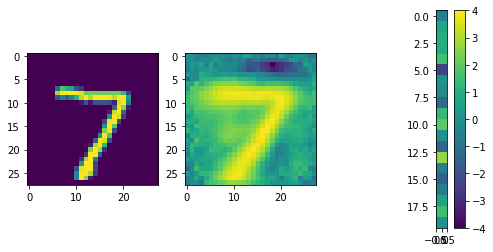

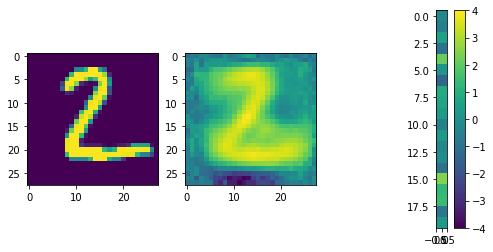

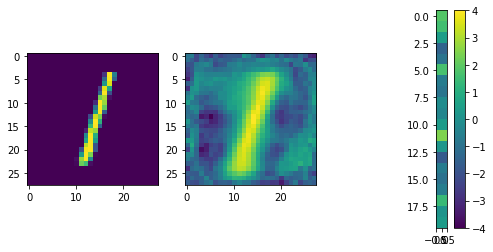

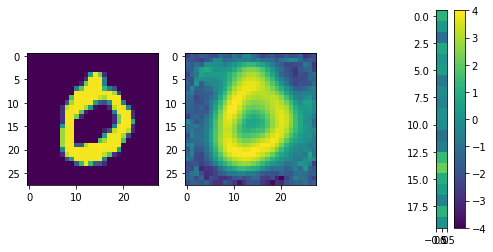

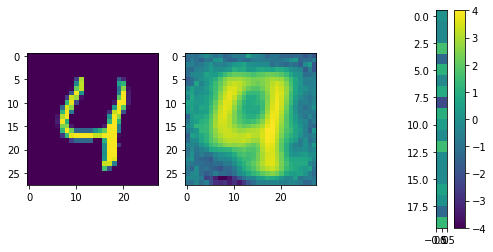

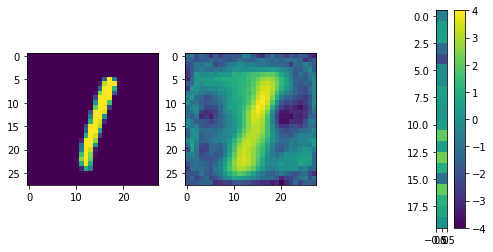

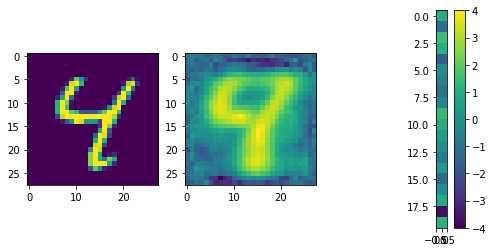

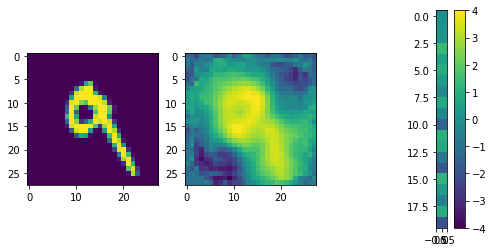

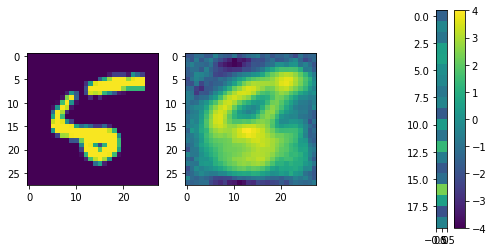

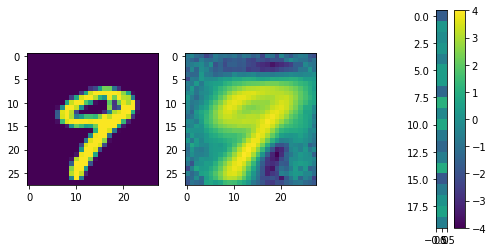

In [64]:
plot_reconstructions('cpu', state_shape=(LATENT_SIZE, 1))

In [65]:
_, test_loader = prepare_data_loaders()
df_mu, df_logvar, df_dec1_weights = generate_latent_dataframes(test_loader)

100%|██████████| 313/313 [00:01<00:00, 283.03it/s]


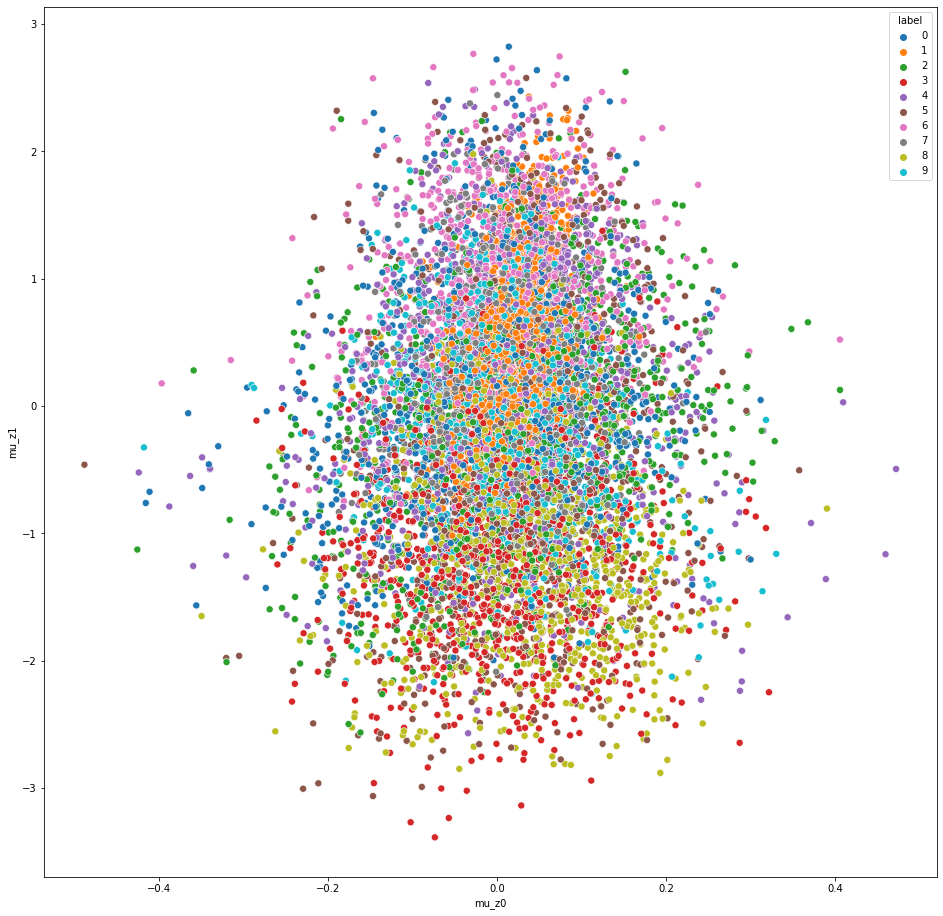

In [66]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x='mu_z0', y='mu_z1', hue='label', s=50, data=df_mu)

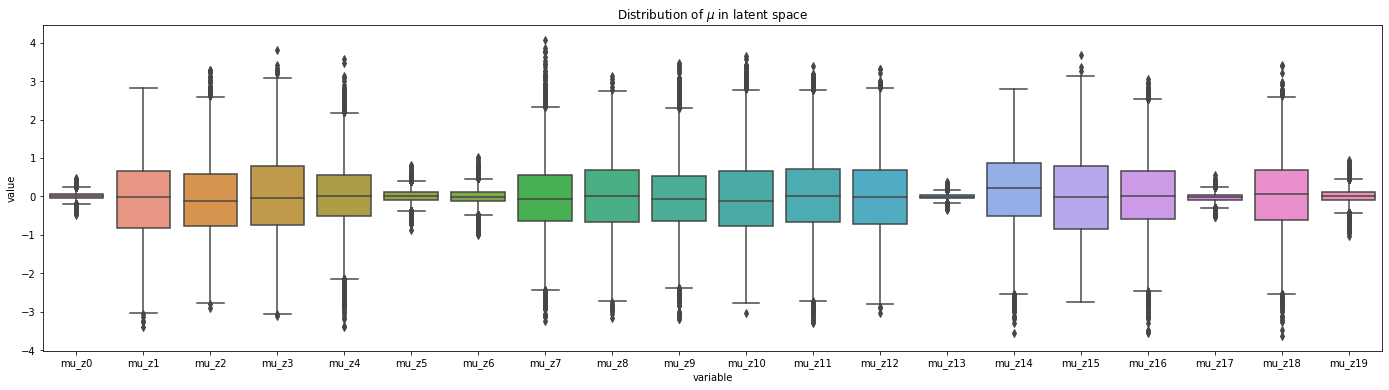

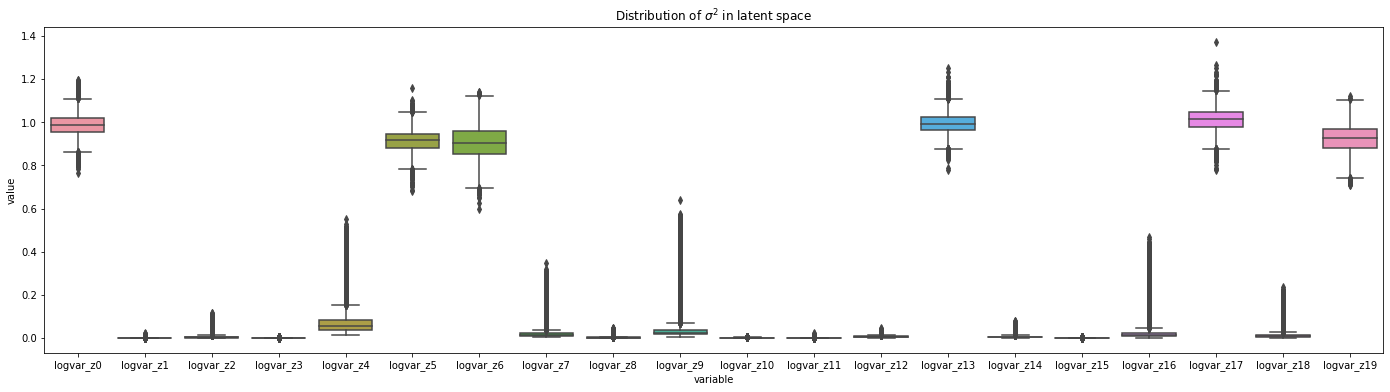

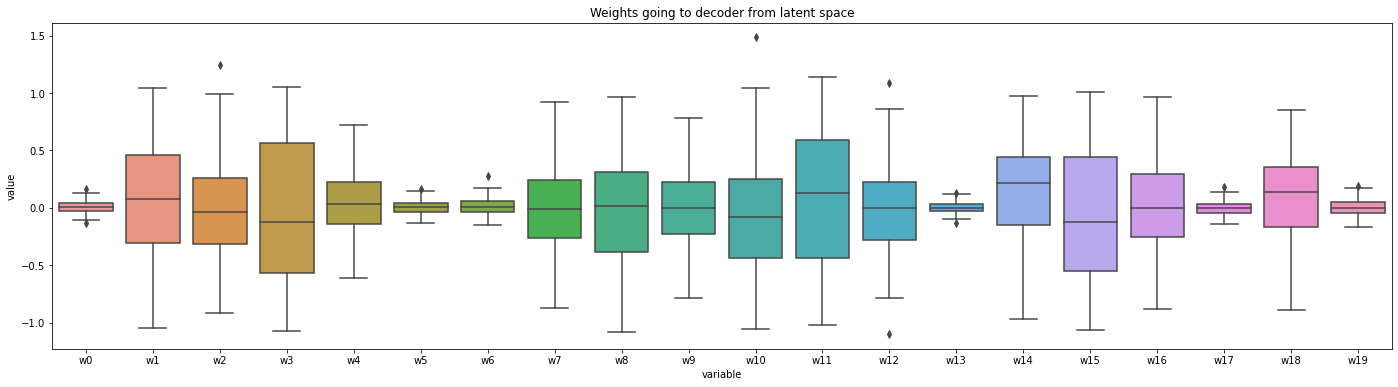

In [67]:
plot_data_boxplots(df_mu, df_logvar, df_dec1_weights)

In [70]:
walk_in_latent_space(latent_space_abs_limit=6, sqrt_sample_count=100, latent_size=LATENT_SIZE, dimensions_to_walk=(0,1))

RuntimeError: ignored

In [72]:
from google.colab import files

with open('zad4_vae_20D.th', 'wb') as f:
    torch.save(model.state_dict(), f)

files.download("zad4_vae_20D.th")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### NAPOMENA: nemojte zaboraviti trenirati model za 2D i 20D !!